# Introduction
## Cancer Cell Analysis via Linear Regression
### By Craig M. Bodo

This Jupyter Notebook implements a linear regression machine learning model that can used to predict the malignancy of a cancer cell based on its observed attributes. The data used for training and testing the model was sourced from a publicly available dataset of cancer cells and their features (https://www.kaggle.com/datasets/erdemtaha/cancer-data/data).

You can see the model in action by generating predictions using randomized cancer cell data at the bottom of this notebook.

# II. Preparation

Import libraries needed to run the application:

In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection, svm
from ipywidgets import widgets

Import the cancer cell dataset from the Cancer_Data.csv file.

In [58]:
# import csv
url = "./Cancer_Data.csv"
data = pd.read_csv(url)

column_names = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Create a dataframe for the dataset. Convert the categorical diagnosis column to numerical.

In [59]:
# create dataframe
df = pd.DataFrame(data,columns=column_names)
# convert target column from categorical to numerical
df['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)

# III. Data Visualization

## A. Heat Map

The heat map below helps visualize correlations between the attributes of cancer cells in the dataset.

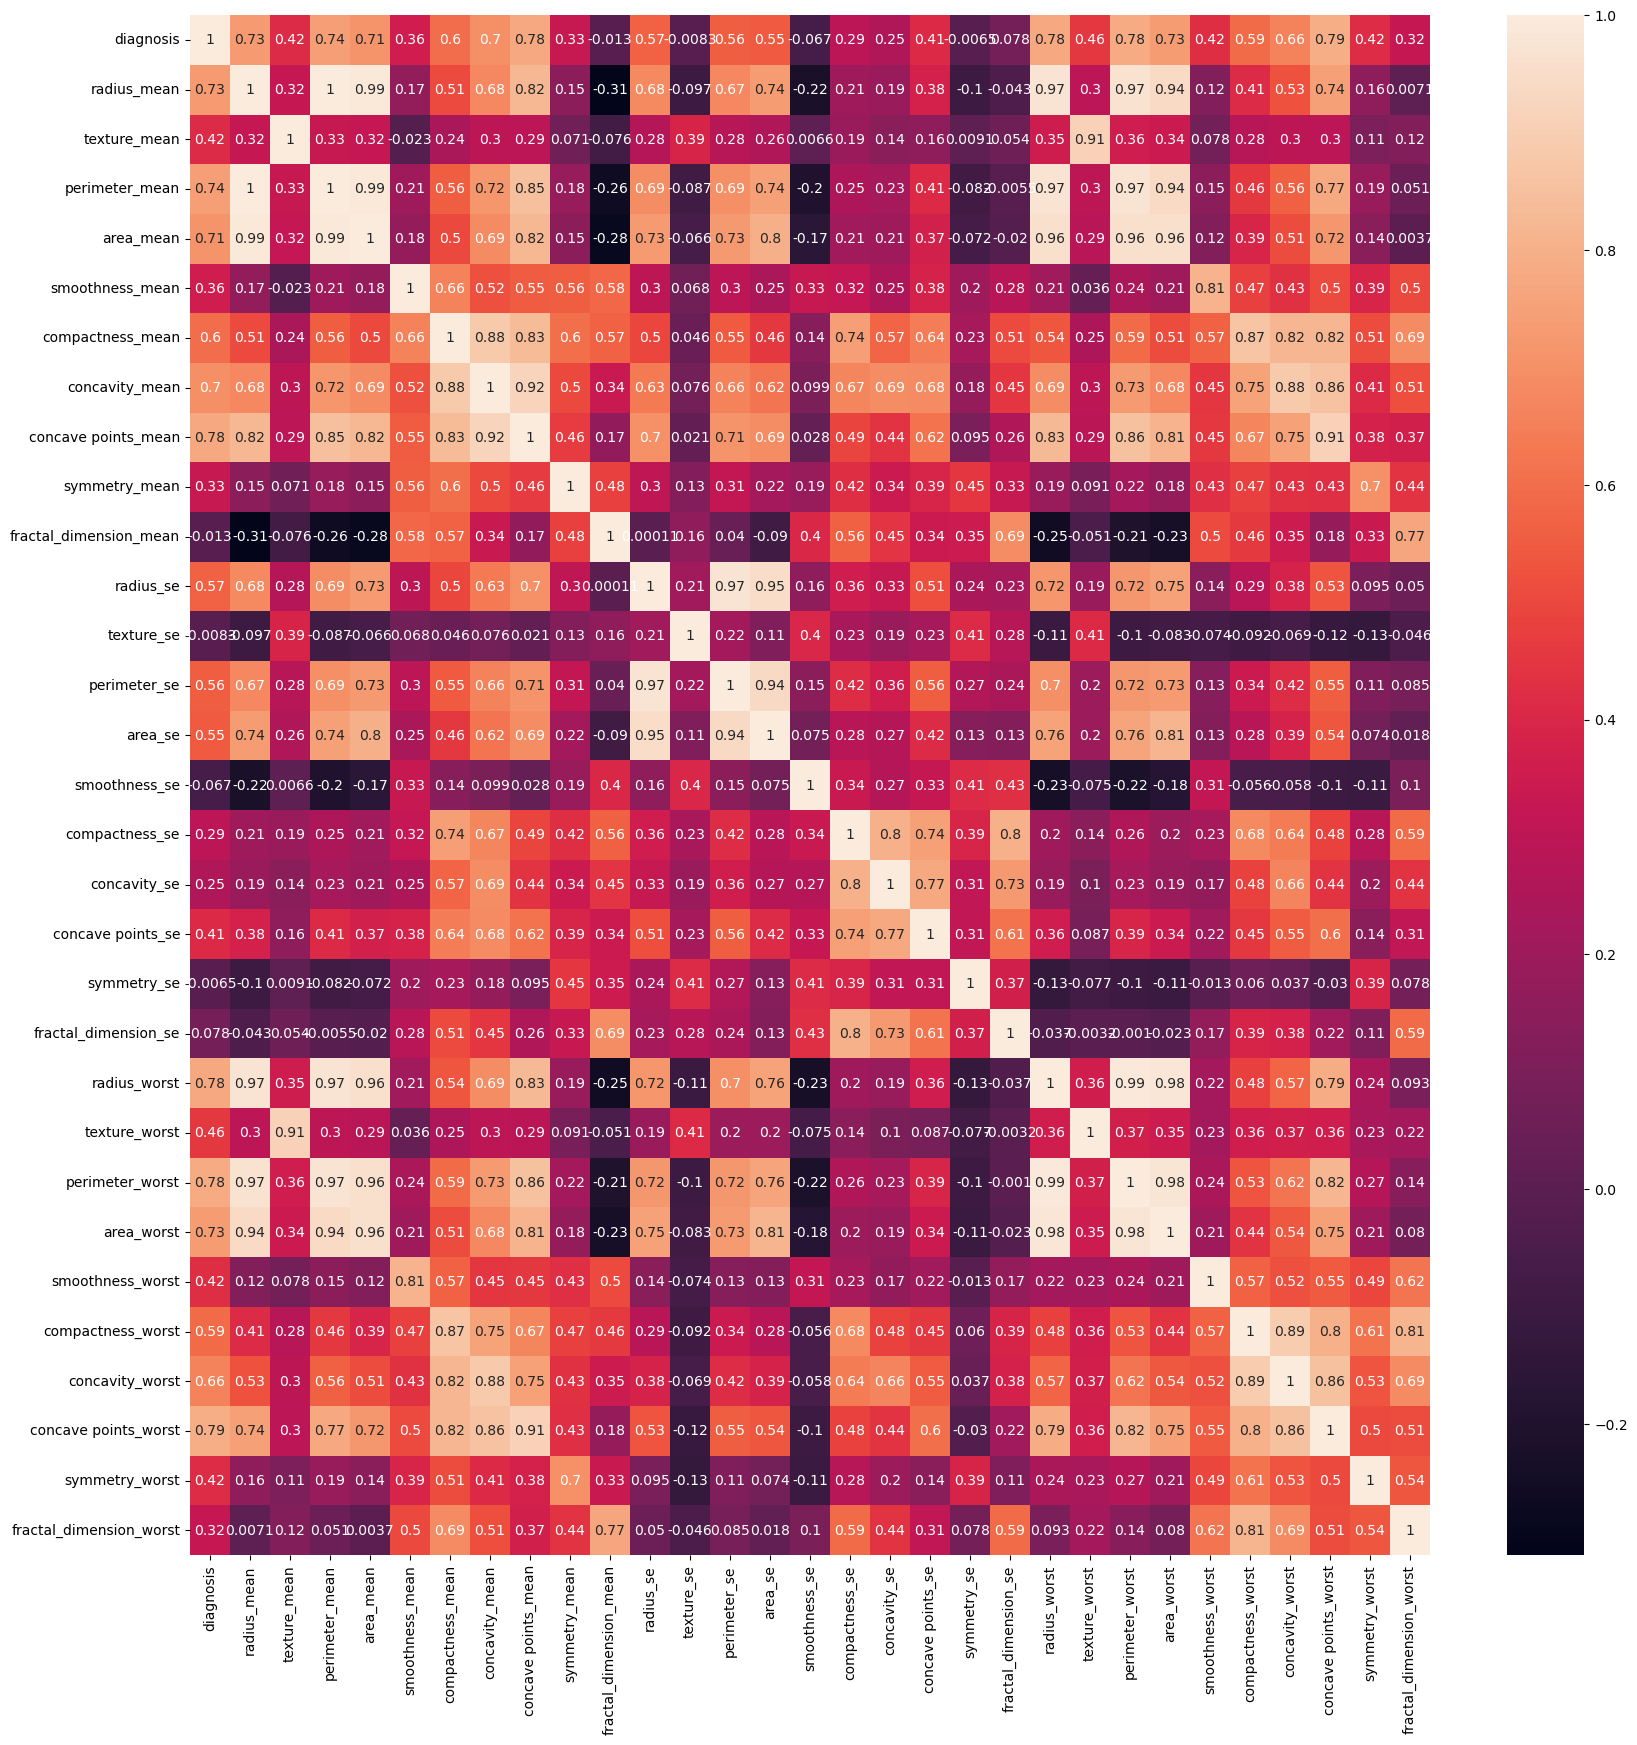

In [60]:
# display heat map of data
pyplot.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True)
pyplot.show()

## B. Bar Graph

A bar graph helps visualize the total number of benign (0) and malignant (1) cancer cells in the dataset.

<Axes: xlabel='diagnosis'>

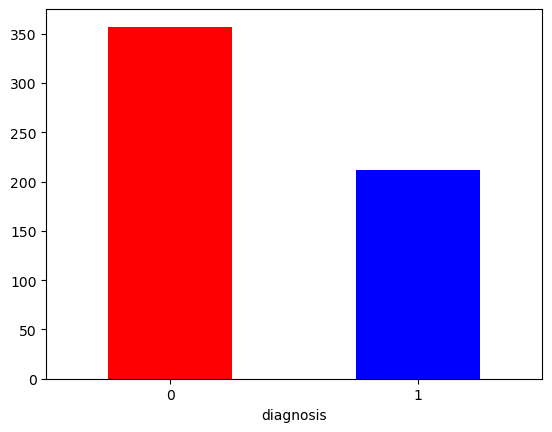

In [61]:
# group data based on diagnosis type and show plot
num_types = df.groupby(by='diagnosis').size()
num_types.plot.bar(color=['red','blue'],rot=0)

## C. Histogram

The following histograms help illustrate how cancer diagnoses are impacted by the various features of a cancer cell.

The data is first divided into two sets: one for benign cells, and one for malignant cells.

In [62]:
# group data by diagnosis type
diagnosis_B = df[df['diagnosis'] == 0]
diagnosis_M = df[df['diagnosis'] == 1]

The following general function generates a histogram for any attribute in the dataset.

In [63]:
# define function to generate histograms
def generate_histplot(attribute):
    sns.histplot(diagnosis_B[attribute], color='blue', kde=True, bins = 10)
    sns.histplot(diagnosis_M[attribute], color='red', kde=True, bins = 10)
    pyplot.show();

Call the function for each attribute in order to visualize the correlation between that attribute and the occurence of a benign or malignant diagnosis.

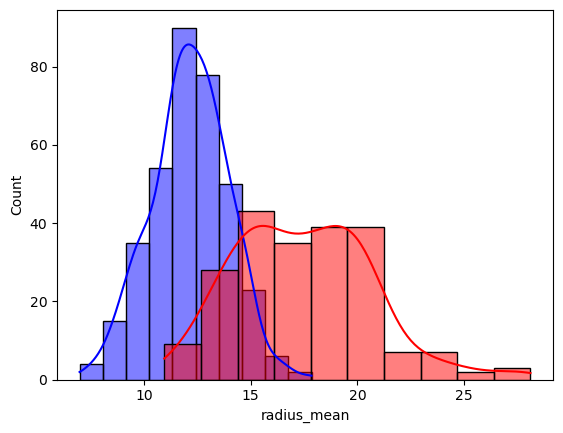

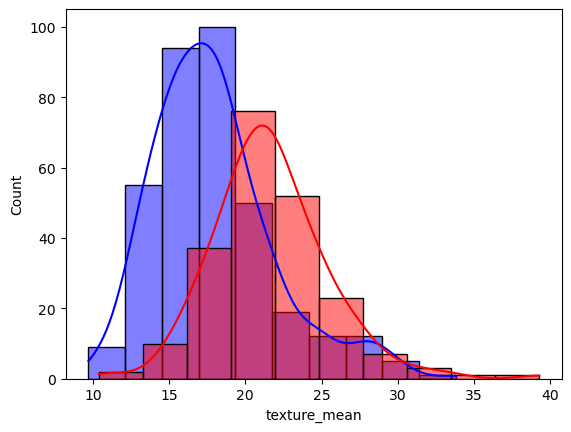

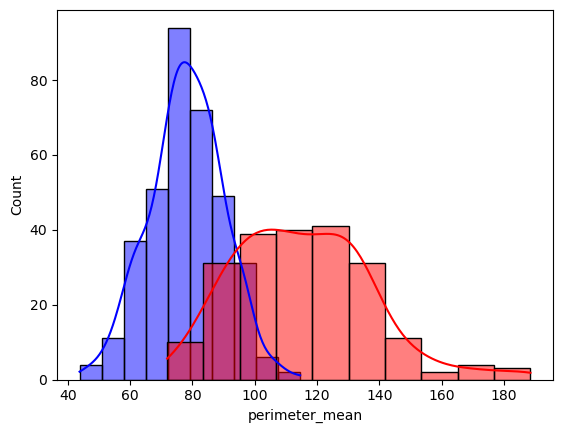

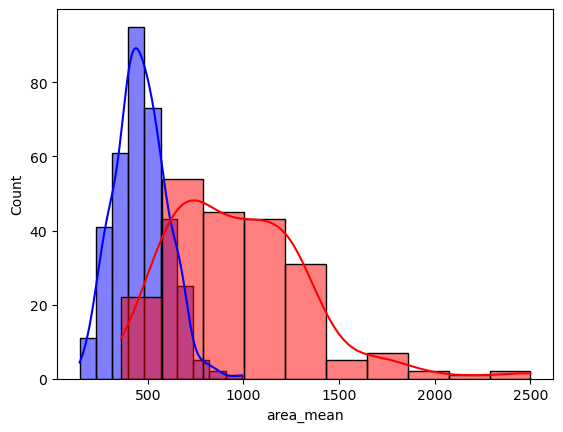

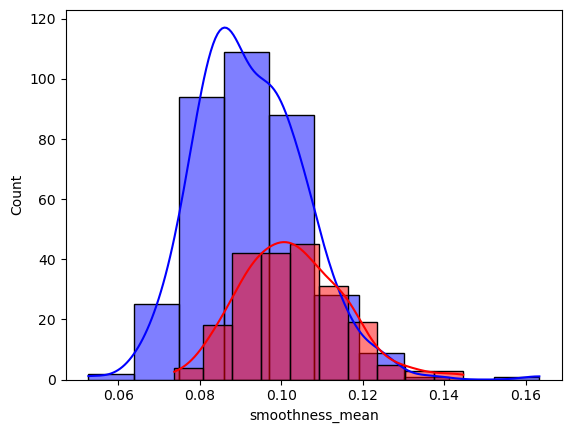

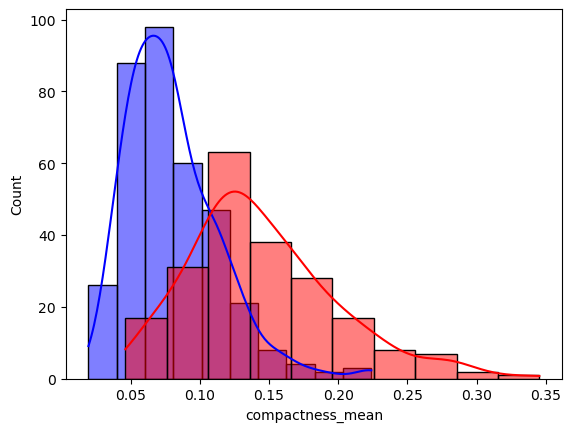

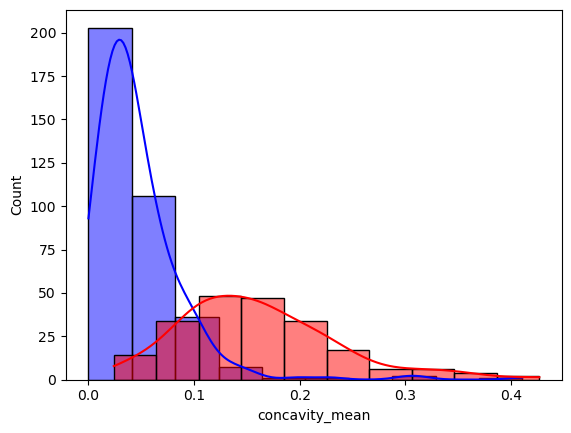

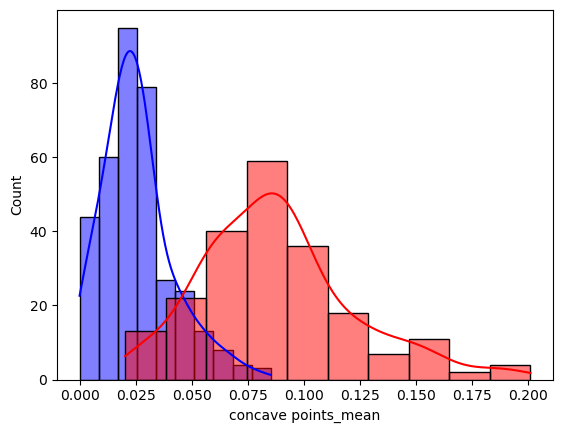

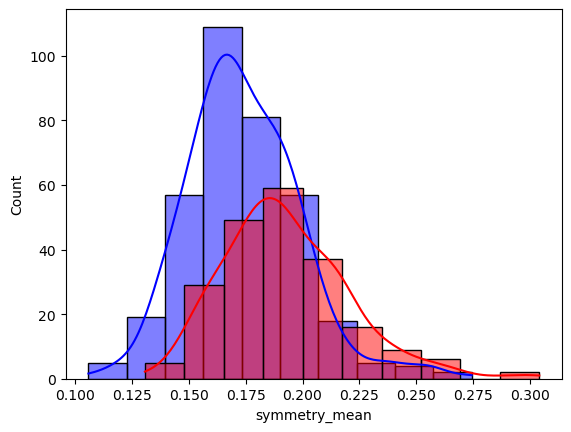

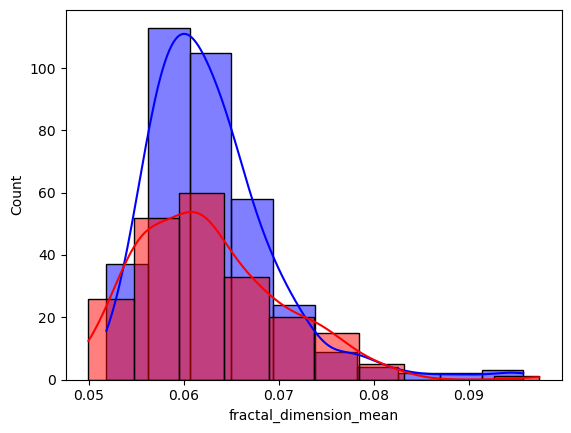

In [64]:
# generate histograms for mean columns
generate_histplot('radius_mean');
generate_histplot('texture_mean');
generate_histplot('perimeter_mean');
generate_histplot('area_mean');
generate_histplot('smoothness_mean');
generate_histplot('compactness_mean');
generate_histplot('concavity_mean');
generate_histplot('concave points_mean');
generate_histplot('symmetry_mean');
generate_histplot('fractal_dimension_mean');

## D. Scatterplot

The scatterplots below helps compare how selected attributes affect the resultant diagnosis.

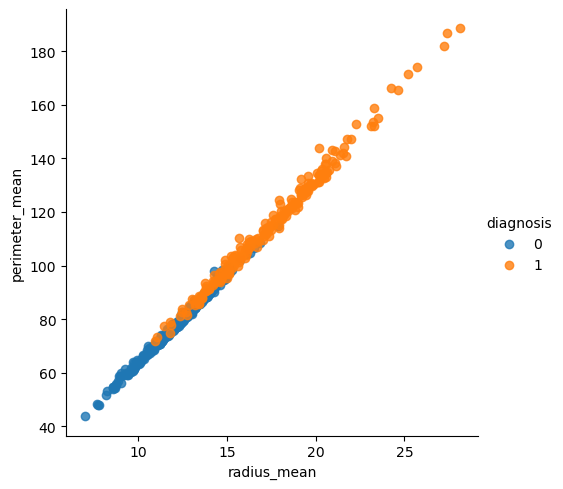

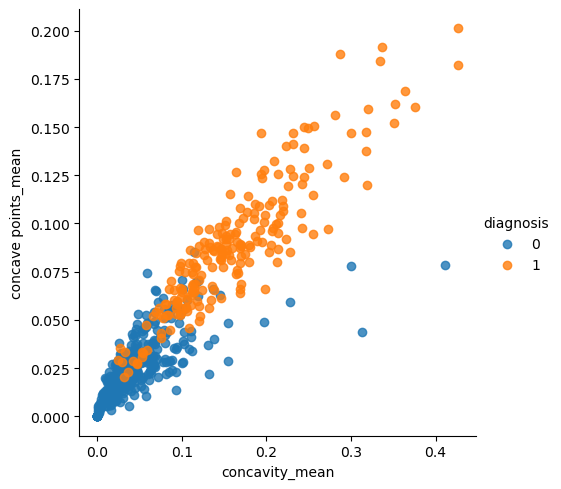

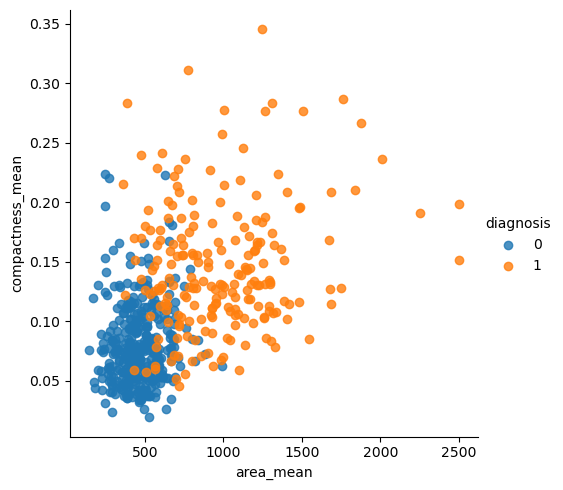

In [65]:
# generate and display lmplots for various attributes
sns.lmplot(data=df, x='radius_mean', y='perimeter_mean', fit_reg=False, hue='diagnosis')
pyplot.show();
sns.lmplot(data=df, x='concavity_mean', y='concave points_mean', fit_reg=False, hue='diagnosis')
pyplot.show();
sns.lmplot(data=df, x='area_mean', y='compactness_mean', fit_reg=False, hue='diagnosis')
pyplot.show();

# IV. Create and Train Model 

Create a `LogisticRegression` model object. 

In [66]:
# create logistic regression model with max iterations set to 10000
log_model = linear_model.LogisticRegression(max_iter=10000)

Split the data into two sets: independent (X) and dependent (y).

In [67]:
# define the independent (X) and dependent (y) sets 
X = df.drop(columns=['diagnosis'])
y = df[['diagnosis']].copy()

Use the `train_test_split` function to create the training and testing sets. 

In [68]:
# create the training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.333, random_state=41)

Use the `fit` function to train the model with the training sets.

In [69]:
# train the model
log_model.fit(X_train.values,np.ravel(y_train))

LogisticRegression(max_iter=10000)

# V. Predictions and Analysis

Use the `predict` function to generate a set of predictions with the X test set.

In [70]:
# generate predictions set
y_pred_log = log_model.predict(X_test.values)

Calculate and display the accuracy score and mean squared error for the predictions. Generate and display a confusion matrix to visualize the results.

Accuracy Score 0.9736842105263158
Mean Squared Error:  0.02631578947368421


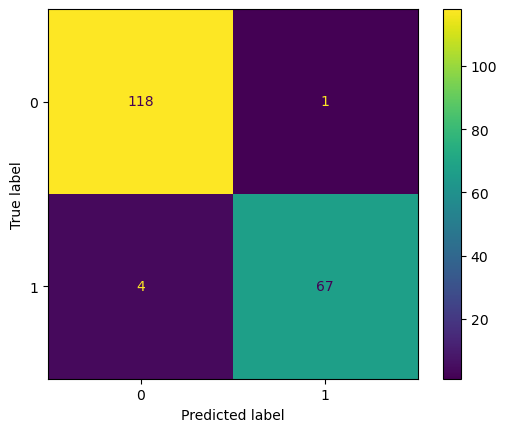

In [71]:
# Accuracy Analysis

# Calculate Accuracy (where accuracy = correct predictions / total predictions)
print("Accuracy Score", metrics.accuracy_score(y_test, y_pred_log))

# Calculate Mean Squared Error
# Measure of the difference between predicted and actual values.
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred_log))

# Generate Confusion Matrix
cm_log = metrics.confusion_matrix(y_test, y_pred_log, labels=log_model.classes_)
disp_log = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_model.classes_)
disp_log.plot()

Use cross-validation to resample the data for further validation. Calculate and display the cross validation average score.

In [72]:
# Cross-validation. 
y_array = np.ravel(y.values)
k_folds = model_selection.KFold(n_splits = 5, shuffle=True)
scores = model_selection.cross_val_score(log_model, X, y_array)

print("Cross Validation Average Score: ", scores.mean())

Cross Validation Average Score:  0.9507995652848935


# VI. User Interface

Run the following code to generate the user interface portion of the program. 

*\*Side Note: The following code generates a 'mock' user interface for this program. In a real-world production environment, this interface would allow a user to input all data for all attributes of a cancer cell. For the the sake of brevity and the grader's time, the following interface will allow the user to fill all fields with random values by clicking the 'Randomize Values' button, then get a prediction by clicking the 'Generate Prediction' button.*

In [73]:
# User Predictions

# defines function to generate a random number for an attribute in a range from the min value in the dataset to the max value in the dataset for that attribute
def generate_rand(attribute):
    min_val = df[attribute].describe()['mean']-2*df[attribute].describe()['std']
    max_val = df[attribute].describe()['mean']+2*df[attribute].describe()['std']
    return random.uniform(min_val, max_val)

# defines a function to generate a FloatText box to store the random values and display to the user
# the box has been disabled for the purposes of this demonstration
def create_float_text_widget(val, label):
    style = {'description_width': '150px'}
    return widgets.FloatText(
        value=val,
        description=label,
        disabled=True,
        style = style,
    )

# initializes an empty list to store the VBox widgets
vb_items = []
title = widgets.HTML(
    value="<h1>Cancer Cell Malignancy Predictor</h1>"
)

# generates the FloatBox widgets for each main attribute
# for simplicity, this demonstration only generates random values for the 'mean' attributes, then copies the result to the matching 'se' and 'worst' attributes
radius_m = create_float_text_widget(0, 'radius mean: ')
texture_m = create_float_text_widget(0, 'texture mean: ')
perimeter_m = create_float_text_widget(0, 'perimeter mean: ')
area_m = create_float_text_widget(0, 'area mean: ')
smoothness_m = create_float_text_widget(0, 'smoothness mean: ')
compactness_m = create_float_text_widget(0, 'compactness mean: ')
concavity_m = create_float_text_widget(0, 'concavity mean: ')
concavepoints_m = create_float_text_widget(0, 'concave points mean: ')
symmetry_m = create_float_text_widget(0, 'symmetry mean: ')
fractal_m = create_float_text_widget(0, 'fractal dimension mean: ')

# adds the widgets to the list
vb_items.extend([title, radius_m, texture_m, perimeter_m, area_m, smoothness_m, compactness_m, concavity_m, concavepoints_m, symmetry_m, fractal_m])

# creates the Randomize and Predict buttons for the user interface
button_random = widgets.Button(description='Randomize Values')
button_predict = widgets.Button(description='Generate Prediction')
button_output = widgets.Label(value='Click \"Randomize Values\" to populate the data, then press \"Generate Prediction\" to predict whether the cancer cell is benign or malignant.')

# defines the on_click behavior of the Randomize button
def on_click_random(b):
    radius_m.value = generate_rand('radius_mean')
    texture_m.value = generate_rand('texture_mean')
    perimeter_m.value = generate_rand('perimeter_mean')
    area_m.value = generate_rand('area_mean')
    smoothness_m.value = generate_rand('smoothness_mean')
    compactness_m.value = generate_rand('compactness_mean')
    concavity_m.value = generate_rand('concavity_mean')
    concavepoints_m.value = generate_rand('concave points_mean')
    symmetry_m.value = generate_rand('symmetry_mean')
    fractal_m.value = generate_rand('fractal_dimension_mean')
    button_output.value = 'Click \"Generate Prediction\" to predict whether the cancer cell is benign or malignant.'
          
# defines the on_click behavior of the Predict button
def on_click_predict(b):
    prediction = log_model.predict([[
        radius_m.value,
        texture_m.value,
        perimeter_m.value,
        area_m.value,
        smoothness_m.value,
        compactness_m.value,
        concavity_m.value,
        concavepoints_m.value,
        symmetry_m.value,
        fractal_m.value,
        radius_m.value,
        texture_m.value,
        perimeter_m.value,
        area_m.value,
        smoothness_m.value,
        compactness_m.value,
        concavity_m.value,
        concavepoints_m.value,
        symmetry_m.value,
        fractal_m.value,
        radius_m.value,
        texture_m.value,
        perimeter_m.value,
        area_m.value,
        smoothness_m.value,
        compactness_m.value,
        concavity_m.value,
        concavepoints_m.value,
        symmetry_m.value,
        fractal_m.value,
    ]])
    result = 'Benign' if prediction[0] == 0 else 'Malignant'
    button_output.value='Prediction: ' + result

# binds the on_click actions to the Randomize and Predict buttons, then appends them to the widget list
button_random.on_click(on_click_random)
button_predict.on_click(on_click_predict)
button_box = widgets.HBox([button_random, button_predict])
vb_items.append(button_box)
vb_items.append(button_output)

# creates the VBox for the UI, then displays it to the user
vb = widgets.VBox(vb_items)
display(vb)